In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid" , {"axes.facecolor":".9"})
pd.set_option("max_column" , None)

In [2]:
#loading our data
variables = pd.read_excel("FoodEnvironmentAtlas.xls" , sheet_name=" Variable List")
supplementary_county_data = pd.read_excel("FoodEnvironmentAtlas.xls" , sheet_name="Supplemental Data - County")
supplementary_state_data = pd.read_excel("FoodEnvironmentAtlas.xls" , sheet_name="Supplemental Data - State")
socioeconomic = pd.read_excel("FoodEnvironmentAtlas.xls" , sheet_name="SOCIOECONOMIC")

In [3]:
socioeconomic.shape

(3143, 18)

In [4]:
socioeconomic.head()

,FIPS,State,County,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
0,1001,AL,Autauga,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,0,18.8,0,1,0.0
1,1003,AL,Baldwin,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,0,19.6,0,1,0.0
2,1005,AL,Barbour,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,1,45.2,1,0,0.0
3,1007,AL,Bibb,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,0,29.3,1,1,0.0
4,1009,AL,Blount,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,0,22.2,0,1,0.0


In [5]:
variables

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
0,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2010",LACCESS_POP10,CNTY10,Count
1,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2015",LACCESS_POP15,CNTY10,Count
2,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (% change), 20...",PCH_LACCESS_POP_10_15,CNTY10,% change
3,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2010",PCT_LACCESS_POP10,CNTY10,Percent
4,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2015",PCT_LACCESS_POP15,CNTY10,Percent
...,...,...,...,...,...,...,...
276,Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,"Persistent-poverty counties, 2010",PERPOV10,CNTY10,Legend
277,Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,"Child poverty rate, 2015",CHILDPOVRATE15,CNTY10,Percent
278,Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,"Persistent-child-poverty counties, 2010",PERCHLDPOV10,CNTY10,Legend
279,Socioeconomic Characteristics,SOCIOECONOMIC,Other,"Metro/nonmetro counties, 2010",METRO13,CNTY10,Legend


In [6]:
socioeconomic_vars = variables[variables["Category Code"] == "SOCIOECONOMIC"]
mapper = socioeconomic_vars[["Variable Code","Variable Name"]]
mapper.set_index(["Variable Code"] , inplace=True)
mapper = mapper["Variable Name"].to_dict()
socioeconomic.rename(columns=mapper , inplace=True)
mapper = supplementary_county_data[["FIPS","State"]]
mapper.set_index(["FIPS"] , inplace=True)
mapper = mapper["State"].to_dict()
socioeconomic["State"] = socioeconomic["FIPS"].map(mapper)

In [7]:
socioeconomic.head()

,FIPS,State,County,"% White, 2010","% Black, 2010","% Hispanic, 2010","% Asian, 2010","% American Indian or Alaska Native, 2010","% Hawaiian or Pacific Islander, 2010","% Population 65 years or older, 2010","% Population under age 18, 2010","Median household income, 2015","Poverty rate, 2015","Persistent-poverty counties, 2010","Child poverty rate, 2015","Persistent-child-poverty counties, 2010","Metro/nonmetro counties, 2010","Population-loss counties, 2010"
0,1001,Alabama,Autauga,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,0,18.8,0,1,0.0
1,1003,Alabama,Baldwin,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,0,19.6,0,1,0.0
2,1005,Alabama,Barbour,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,1,45.2,1,0,0.0
3,1007,Alabama,Bibb,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,0,29.3,1,1,0.0
4,1009,Alabama,Blount,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,0,22.2,0,1,0.0


In [8]:
socioeconomic.columns

Index(['FIPS', 'State', 'County', '% White, 2010', '% Black, 2010',
       '% Hispanic, 2010', '% Asian, 2010',
       '% American Indian or Alaska Native, 2010',
       '% Hawaiian or Pacific Islander, 2010',
       '% Population 65 years or older, 2010',
       '% Population under age 18, 2010', 'Median household income, 2015',
       'Poverty rate, 2015', 'Persistent-poverty counties, 2010',
       'Child poverty rate, 2015', 'Persistent-child-poverty counties, 2010',
       'Metro/nonmetro counties, 2010', 'Population-loss counties, 2010'],
      dtype='object')

In [9]:
socioeconomic.head()

,FIPS,State,County,"% White, 2010","% Black, 2010","% Hispanic, 2010","% Asian, 2010","% American Indian or Alaska Native, 2010","% Hawaiian or Pacific Islander, 2010","% Population 65 years or older, 2010","% Population under age 18, 2010","Median household income, 2015","Poverty rate, 2015","Persistent-poverty counties, 2010","Child poverty rate, 2015","Persistent-child-poverty counties, 2010","Metro/nonmetro counties, 2010","Population-loss counties, 2010"
0,1001,Alabama,Autauga,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,0,18.8,0,1,0.0
1,1003,Alabama,Baldwin,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,0,19.6,0,1,0.0
2,1005,Alabama,Barbour,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,1,45.2,1,0,0.0
3,1007,Alabama,Bibb,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,0,29.3,1,1,0.0
4,1009,Alabama,Blount,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,0,22.2,0,1,0.0


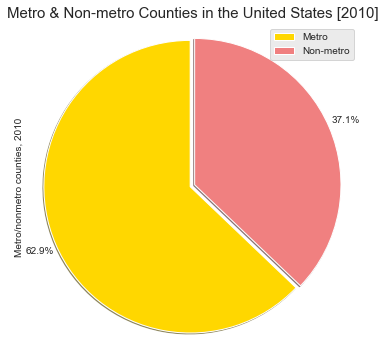

In [66]:
explode_list = [0.1,0]
colors_list = ["gold","lightcoral"]
socioeconomic["Metro/nonmetro counties, 2010"].value_counts().plot(kind="pie",
                                                                  figsize=(15,6),
                                                                  autopct="%1.1f%%",
                                                                  startangle=90,
                                                                  shadow=True,
                                                                  labels=None,
                                                                  pctdistance=1.12,
                                                                  explode=explode_list,
                                                              colors=colors_list,
                                                                  radius=3)
plt.axis("image")
plt.title("Metro & Non-metro Counties in the United States [2010]",fontsize=15)
plt.legend(labels=["Metro","Non-metro"] , loc="upper right")
plt.savefig("images/Metro Non-Metro Pie")
plt.show()

How does a county being Metro or a Non-metro affects the county and state ??

In [11]:
socioeconomic.head()

,FIPS,State,County,"% White, 2010","% Black, 2010","% Hispanic, 2010","% Asian, 2010","% American Indian or Alaska Native, 2010","% Hawaiian or Pacific Islander, 2010","% Population 65 years or older, 2010","% Population under age 18, 2010","Median household income, 2015","Poverty rate, 2015","Persistent-poverty counties, 2010","Child poverty rate, 2015","Persistent-child-poverty counties, 2010","Metro/nonmetro counties, 2010","Population-loss counties, 2010"
0,1001,Alabama,Autauga,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,0,18.8,0,1,0.0
1,1003,Alabama,Baldwin,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,0,19.6,0,1,0.0
2,1005,Alabama,Barbour,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,1,45.2,1,0,0.0
3,1007,Alabama,Bibb,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,0,29.3,1,1,0.0
4,1009,Alabama,Blount,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,0,22.2,0,1,0.0


In [12]:
socioeconomic["Metro/nonmetro counties, 2010"].replace({1:"Metro County",
                                                      0:"Non-Metro County"},
                                                      inplace=True)
socioeconomic["Persistent-poverty counties, 2010"].replace({1:"Persistent Poverty County",
                                                      0:"Non Poverty Persisent County"},
                                                      inplace=True)
socioeconomic["Population-loss counties, 2010"].replace({1:"Lost Population",
                                                      0:"No Population Loss"},
                                                      inplace=True)

### Poverty rate

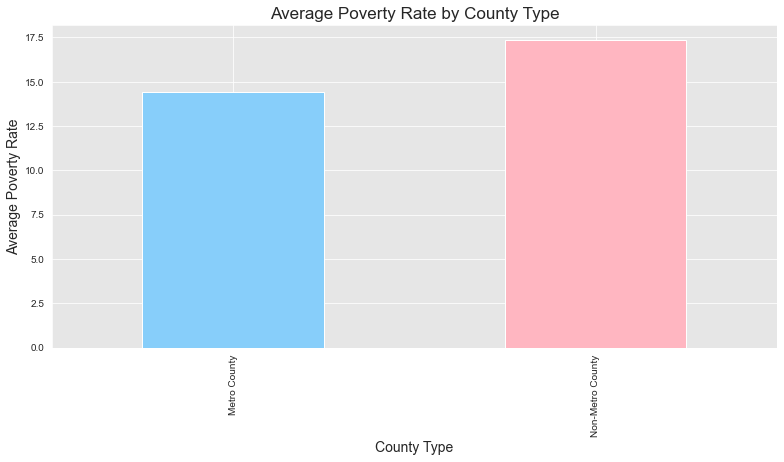

In [50]:
color_list = ["lightskyblue","lightpink"]
socioeconomic.groupby(by=["Metro/nonmetro counties, 2010"])["Poverty rate, 2015"].mean().plot(kind="bar",
                                                                                              figsize=(13,7),
                                                                                             color=color_list)
plt.title("Average Poverty Rate by County Type" , fontsize=17)
plt.xlabel("County Type" , fontsize=14)
plt.ylabel("Average Poverty Rate" , fontsize=14)
plt.gcf().subplots_adjust(bottom=0.24)
plt.savefig("images/Poverty Rate Group")
plt.show()

### Median Household Income

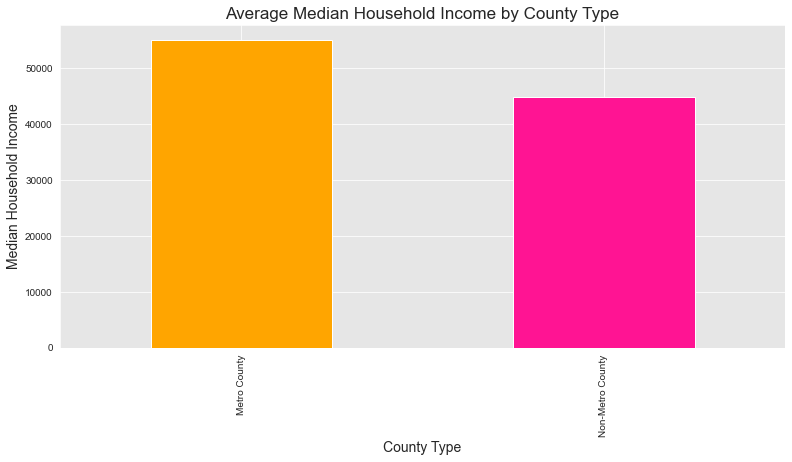

In [51]:
color_list = ["orange","deeppink"]
socioeconomic.groupby(by=["Metro/nonmetro counties, 2010"])["Median household income, 2015"].mean().plot(kind="bar",
                                                                                              figsize=(13,7),
                                                                                             color=color_list)
plt.title("Average Median Household Income by County Type" , fontsize=17)
plt.xlabel("County Type" , fontsize=14)
plt.ylabel("Median Household Income" , fontsize=14)
plt.gcf().subplots_adjust(bottom=0.24)
plt.savefig("images/Median Household Income Group")
plt.show()

In [35]:
socioeconomic.groupby(by=["Metro/nonmetro counties, 2010"])["Median household income, 2015"].mean()

Metro/nonmetro counties, 2010
Metro County        55022.534764
Non-Metro County    44827.417933
Name: Median household income, 2015, dtype: float64

### Persistent Poverty County

In [15]:
socioeconomic["Persistent-poverty counties, 2010"].unique()

array(['Non Poverty Persisent County', 'Persistent Poverty County'],
      dtype=object)

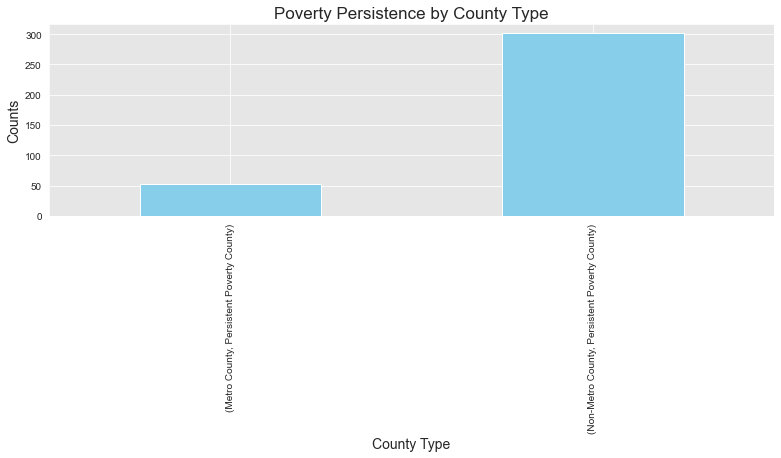

In [57]:
color_list = ["skyblue","skyblue","gold","gold"]
pers_pov_group = socioeconomic.groupby(by=["Metro/nonmetro counties, 2010"])["Persistent-poverty counties, 2010"].value_counts()
pers_pov_group.drop(level=1,index="Non Poverty Persisent County").plot(kind="bar",
                                                                        figsize=(13,7),
                                                                        color=color_list)
plt.title("Poverty Persistence by County Type" , fontsize=17)
plt.xlabel("County Type" , fontsize=14)
plt.ylabel("Counts" , fontsize=14)
plt.gcf().subplots_adjust(bottom=0.50)
plt.savefig("images/Persistent Poverty County")
plt.show()

In [40]:
pers_pov_group

Metro/nonmetro counties, 2010  Persistent-poverty counties, 2010
Metro County                   Non Poverty Persisent County         1115
                               Persistent Poverty County              52
Non-Metro County               Non Poverty Persisent County         1675
                               Persistent Poverty County             301
Name: Persistent-poverty counties, 2010, dtype: int64

### Population Loss Occurence

In [17]:
socioeconomic["Population-loss counties, 2010"].unique()

array(['No Population Loss', 'Lost Population', nan], dtype=object)

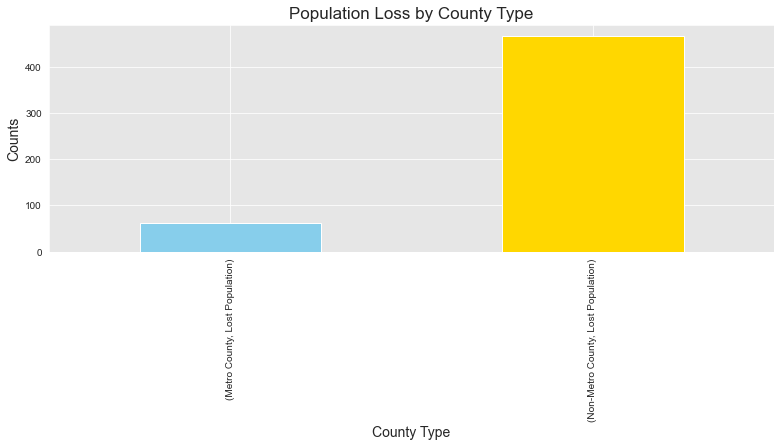

In [60]:
color_list = ["skyblue","gold"]
pop_loss_group = socioeconomic.groupby(by=["Metro/nonmetro counties, 2010"])["Population-loss counties, 2010"].value_counts()
pop_loss_group.drop(level=1,index="No Population Loss").plot(kind="bar",
                                                            figsize=(13,7),
                                                            color=color_list)
plt.title("Population Loss by County Type" , fontsize=17)
plt.xlabel("County Type" , fontsize=14)
plt.ylabel("Counts" , fontsize=14)
plt.gcf().subplots_adjust(bottom=0.43)
plt.savefig("images/Population loss")
plt.show()

In [77]:
pop_loss_group

Metro/nonmetro counties, 2010  Population-loss counties, 2010
Metro County                   No Population Loss                1105
                               Lost Population                     62
Non-Metro County               No Population Loss                1507
                               Lost Population                    467
Name: Population-loss counties, 2010, dtype: int64

### Race

In [20]:
metro_race = socioeconomic.loc[:,"% White, 2010":"% Hawaiian or Pacific Islander, 2010"]
metro_race["Metro/nonmetro counties, 2010"] = socioeconomic["Metro/nonmetro counties, 2010"]

In [21]:
metro_race = metro_race.melt(id_vars=["Metro/nonmetro counties, 2010"])
metro_race_edit = metro_race.groupby(by=["Metro/nonmetro counties, 2010","variable"]).mean()

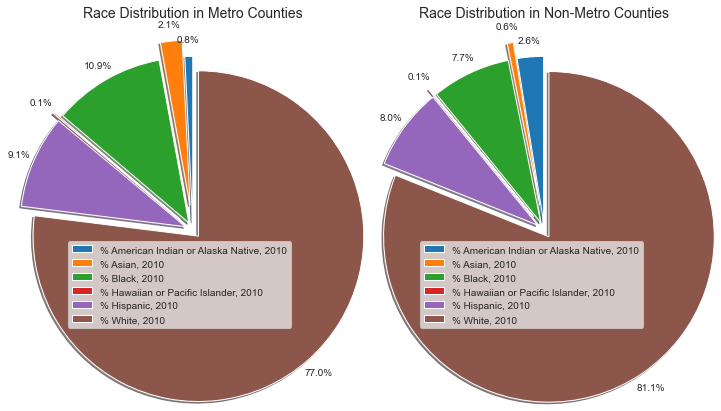

In [79]:
fig , ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
explode_list = [0.1,0.3,0.1,0.2,0.1,0.1]
metro_race_edit.loc["Metro County"]["value"].plot(kind="pie",
                                                     autopct="%.1f%%",
                                                     startangle=90,
                                                     radius=2,
                                                     explode=explode_list,
                                                     shadow=True,
                                                     pctdistance=1.1,
                                                     figsize=(10,7),
                                                     labels=None,
                                                 ax=ax[0])
ax[0].legend(labels=metro_race_edit.loc["Non-Metro County"].index , loc="lower right")
ax[0].set_title("Race Distribution in Metro Counties" , fontsize=14 , loc="center" , y=1.5)


explode_list = [0.1,0.3,0.1,0.2,0.1,0.1]
metro_race_edit.loc["Non-Metro County"]["value"].plot(kind="pie",
                                                     autopct="%.1f%%",
                                                     startangle=90,
                                                     radius=2,
                                                     explode=explode_list,
                                                     shadow=True,
                                                     pctdistance=1.1,
                                                     figsize=(10,7),
                                                     labels=None,
                                                     ax=ax[1])
ax[1].legend(labels=metro_race_edit.loc["Non-Metro County"].index , loc="lower right")
ax[1].set_title("Race Distribution in Non-Metro Counties" , fontsize=14 , loc="center" , y=1.5)
plt.subplots_adjust(wspace=0.7)
plt.savefig("images/races_plot")
plt.show()